In [1]:
import time
import argparse

import ioh
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from modcma.c_maes import ModularCMAES, parameters, options, constants, utils, es

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 15})

def get_one_plus_one(problem, dim, sampler):
    modules = parameters.Modules()
    modules.sample_transformation = options.SampleTranformerType(sampler)
    
    x0 = np.random.uniform(-5, 5, size=dim)
    return es.OnePlusOneES(
        dim,
        x0=x0,
        f0=problem(x0),
        sigma0=1,
        modules=modules,
    )
    
names = sorted([options.SampleTranformerType(sampler).name.title().replace("Scaled_", "").replace("Double_", "d") 
                for sampler in range(1, 7)], key=lambda x:x.lower())
colors = dict(zip(names, sns.color_palette("tab10")))

def get_name(sampler_cls):
    return sampler_cls.__name__.replace("Transformer", "").replace("Scaler", "").replace("Double", "d")

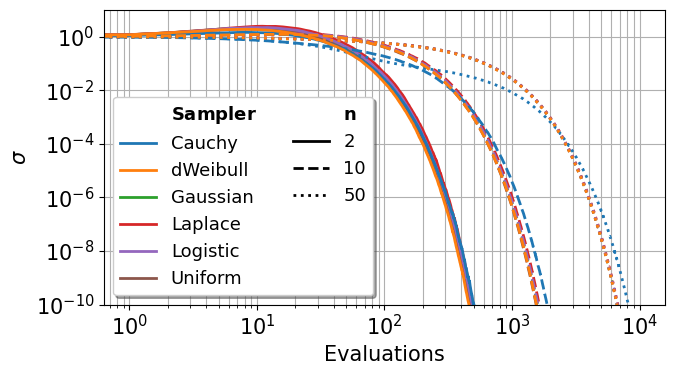

In [29]:
def sphere(x):
    return x.dot(x)


n_evals = 10000
n_runs = 1000

linestyle = {
    2: "solid",
    10: "dashed",
    50: "dotted"
}

np.random.seed(1)
utils.set_seed(1)
linewidth = 2

f, ax = plt.subplots(figsize=(7, 4))
for sampler in range(1, 7):
    for d in (2, 10, 50):
        f = np.zeros(n_evals)
        s = np.zeros(n_evals)
        for r in range(n_runs):
            alg = get_one_plus_one(sphere, d, sampler)
            for e in range(n_evals):
                f[e] += alg.f
                s[e] += alg.sigma
                alg.step(sphere)
        
        f /= n_runs
        s /= n_runs
        sampler_name = get_name(alg.sampler.__class__)
        ax.plot(s, color=colors[sampler_name], linestyle=linestyle[d], label=sampler_name, linewidth=linewidth)

ax.legend()
ax.set_yscale("log")
ax.set_xscale("log")

from matplotlib.lines import Line2D

handles = [Line2D([0], [0], linestyle='')]
labels = ["$\\bf{Sampler}$"]

for alg, color in colors.items():
    handles.append(Line2D([0], [0], label=alg, color=color, linewidth=linewidth))
    labels.append(alg)


handles.append(Line2D([0], [0], linestyle=''))
labels.append("$\\mathbf{n}$")

for alg, color in linestyle.items():
    handles.append(Line2D([0], [0], label=alg, color='black', linestyle=color, linewidth=linewidth))
    labels.append(alg)

handles.append(Line2D([0], [0], linestyle=''))
labels.append("")      
handles.append(Line2D([0], [0], linestyle=''))
labels.append("")      

ax.legend(handles, labels, loc='lower left', fancybox=True, shadow=True, fontsize=13, ncol=2)
ax.set_ylim(1e-10, 10)
ax.grid(which="both", axis="both")
ax.set_ylabel(r"$\sigma$")
ax.set_xlabel(r"Evaluations")
plt.tight_layout()
plt.savefig("figures/1p1_sigma.pdf")

In [30]:
f

array([4.14267488e+02, 4.12605352e+02, 4.10393627e+02, ...,
       1.50772529e-27, 1.50073599e-27, 1.49219707e-27])